In [2]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [3]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [5]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [6]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(autoload_with=engine)

In [7]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [8]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [9]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [10]:
# Find the most recent date in the data set.
session.query(Measurement.date).order_by(Measurement.date.desc()).first()

('2017-08-23',)

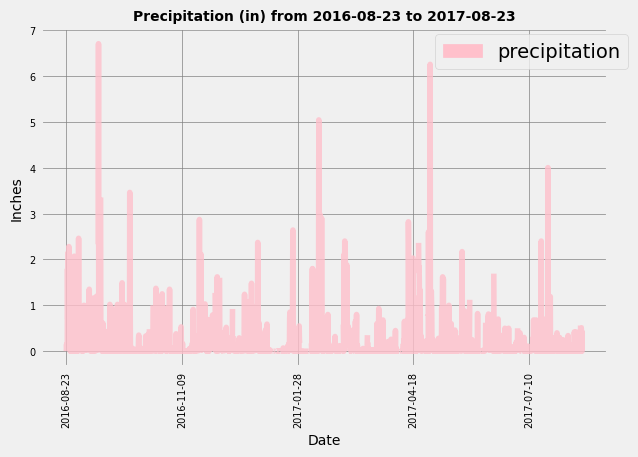

In [150]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 

# Starting from the most recent data point in the database. 
most_recent_date = session.query(Measurement.date).order_by(Measurement.date.desc()).first()
most_recent_date_position = most_recent_date[0]
most_recent_date_str = dt.datetime.strptime(most_recent_date_position,'%Y-%m-%d').date()

# Calculate the date one year from the last date in data set.
query_date = dt.date(2017,8,23) - dt.timedelta(days=365)

# Perform a query to retrieve the date and precipitation scores
precipitation_last_year = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >='2016-08-23').\
    order_by(Measurement.date).all()

# Save the query results as a Pandas DataFrame and set the index to the date column
df = pd.DataFrame(precipitation_last_year, columns=['date', 'prcp'])
df.set_index('date', inplace=True)

# Sort the dataframe by date
df_sorted =  df.sort_values(by=["date"],ascending=True)

# Use Pandas Plotting with Matplotlib to plot the data
import matplotlib.patches as mpatches

df_sorted.plot(legend=True,color='pink', alpha=0.8)
plt.xticks(fontsize=7, rotation = 90)
plt.yticks(fontsize=7, rotation = 0)
plt.xlabel("Date", fontdict={"fontsize": 10})
plt.ylabel("Inches", fontdict={"fontsize": 10})
plt.title(f'Precipitation (in) from {query_date} to {most_recent_date_str}', fontweight = 'bold', size=10)
plt.tight_layout()
pink_patch = mpatches.Patch(color='pink', label='precipitation')
plt.legend(handles=[pink_patch], loc = (0.695,0.88))
plt.grid(color = 'gray', linestyle = '-', linewidth = 0.5)
plt.show()

In [79]:
# Use Pandas to calculate the summary statistics for the precipitation data
df_sorted.describe()

,prcp
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [81]:
# Design a query to calculate the total number stations in the dataset
session.query(Measurement.station).distinct().count()

9

In [164]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.
most_active_stations = session.query(Measurement.station, func.count(Measurement.station)).\
    group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).all()

print(f'The station id that has the greatest number of observations is {most_active_stations[0]}')
most_active_stations

The station id that has the greatest number of observations is ('USC00519281', 2772)


[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [84]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
session.query(func.min(Measurement.tobs), func.max(Measurement.tobs), func.avg(Measurement.tobs)).\
    filter(Measurement.station == 'USC00519281').all()

[(54.0, 85.0, 71.66378066378067)]

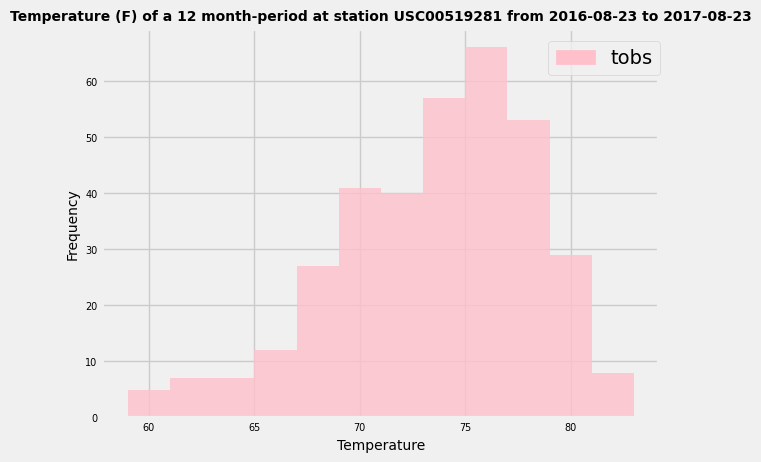

In [157]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
from pandas.plotting import table
prev_year = dt.date(2017, 8, 23) - dt.timedelta(days=365)

results = session.query(Measurement.tobs).\
    filter(Measurement.station == 'USC00519281').\
    filter(Measurement.date >= prev_year).all()

# PLOT THE RESULTS AS A HISTOGRAM
results_df = pd.DataFrame(results)

plt.hist(results_df, alpha=0.8,color='pink', bins=12)
plt.xticks(fontsize=7, rotation=0)
plt.yticks(fontsize=7,rotation=0)
plt.xlabel('Temperature', fontdict={"fontsize": 10})
plt.ylabel('Frequency', fontdict={"fontsize": 10})
plt.title(f'Temperature (F) of a 12 month-period at station USC00519281 from {prev_year} to {most_recent_date_str}',fontweight = 'bold', size=10)
pink_patch = mpatches.Patch(color='pink', label='tobs')
plt.legend(handles=[pink_patch], loc = (0.8,0.88))
plt.show()

# Close session

In [165]:
# Close Session
session.close()